<a href="https://colab.research.google.com/github/kiranmohan3236/Pandas/blob/main/Netflix_Data_Exploration_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Basic Analysis
1. Un-nesting the columns

  a. Un-nest the columns those have cells with multiple comma separated values by creating multiple rows

In [ ]:
multi_value_cols = ['cast', 'director', 'listed_in', 'country']

def unnest_columns(df, columns):
    for col in columns:
        df = df.assign(**{col: df[col].str.split(', ')}).explode(col)
    return df

df_unnested = unnest_columns(df, multi_value_cols)


non_nested_cols = ['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']


df_final = pd.merge(df_unnested, df[non_nested_cols], on='show_id', how='left')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_column_name,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,September


### 2. Handling null values
  a. For categorical variables with null values, update those rows as
unknown_column_name.

Example : Replace missing value with Unknown Actor for missing value in
Actors column.

  b. Replace with 0 for continuous variables having null values.

In [ ]:
import pandas as pd


categorical_cols = ['director', 'cast', 'country']


for col in categorical_cols:
    df[col].fillna('unknown_column_name', inplace=True)


continuous_cols = ['release_year', 'duration']


for col in continuous_cols:
    df[col].fillna(0, inplace=True)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_column_name,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,September
1,s2,TV Show,Blood & Water,unknown_column_name,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,September


## 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

a. For Non-graphical Analysis:

Hint : We want you to find the values counts of each category for the given
column



In [ ]:
import pandas as pd

categorical_cols = ['listed_in']

non_graphical_counts = {}
for col in categorical_cols:
    non_graphical_counts[col] = df[col].value_counts()

for col, counts in non_graphical_counts.items():
    print(f"\nCategory for Genre:\n{counts}")


Category for Genre:
Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows              

## Genre Analysis:
### Top 5 Genres by Count:
*   Dramas: 29,775, International Movies: 28,211, Comedies: 20,829, International TV Shows: 12,845, Action & Adventure: 12,216
*   The dataset provides a variety of genres, with dramas being the most prevalent, followed by international movies and comedies.


*   The distribution suggests a diverse content catalog, catering to various audience preferences.






### 1. b. For graphical analysis:

Hint : We can use a count plot to get the counts of each category

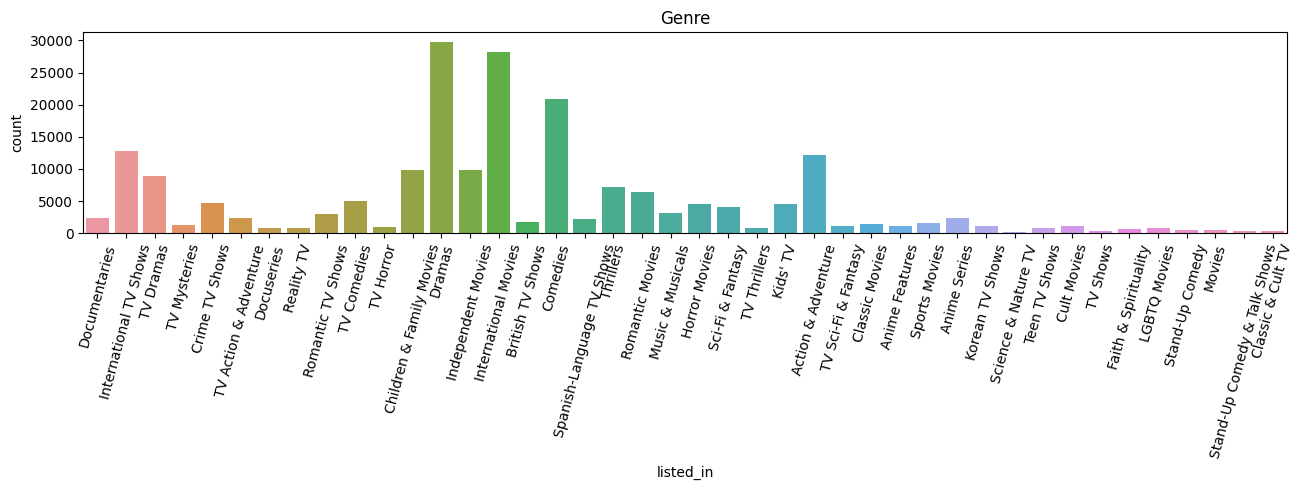

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['listed_in']

plt.figure(figsize=(50, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Genre')
    plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

## Genre Analysis:
### Top 5 Genres by Count:
*   Dramas: 29,775, International Movies: 28,211, Comedies: 20,829, International TV Shows: 12,845, Action & Adventure: 12,216
*   The dataset provides a variety of genres, with dramas being the most prevalent, followed by international movies and comedies.


*   The distribution suggests a diverse content catalog, catering to various audience preferences.

### 2.Comparison of tv shows vs. movies.

a. Find the number of movies produced in each country and pick the top 10
countries.

Hint : We want you to apply group by each country and find the count of unique
titles of movies

In [ ]:
import pandas as pd

movies_df = df[df['type'] == 'Movie']

movies_by_country = movies_df.groupby('country')['title'].nunique().reset_index()

movies_by_country_sorted = movies_by_country.sort_values(by='title', ascending=False)


top_10_countries_movies = movies_by_country_sorted.head(10)

print(top_10_countries_movies)

                 country  title
114        United States   2750
43                 India    961
112       United Kingdom    532
122  unknown_column_name    440
20                Canada    319
34                France    303
36               Germany    182
100                Spain    171
51                 Japan    119
23                 China    114




*   The majority of movies in the dataset are produced in the United States, followed by India and the United Kingdom.
*   Tailoring promotional and marketing efforts based on the countries with high movie production can enhance audience engagement and platform adoption in specific regions.


*   Understanding the distribution of movie production can guide content acquisition strategies, ensuring a balanced and diverse content catalog.





b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

Hint : We want you to apply group by each country and find the count of unique
titles of Tv-shows

In [ ]:
import pandas as pd


tv_shows_df = df[df['type'] == 'TV Show']

tv_shows_by_country = tv_shows_df.groupby('country')['title'].nunique().reset_index()

tv_shows_by_country_sorted = tv_shows_by_country.sort_values(by='title', ascending=False)

top_10_countries_tv_shows = tv_shows_by_country_sorted.head(10)

print(top_10_countries_tv_shows)

                country  title
63        United States    938
66  unknown_column_name    390
62       United Kingdom    272
30                Japan    199
52          South Korea    170
8                Canada    126
19               France     90
25                India     84
57               Taiwan     70
2             Australia     66




*   The United States leads in TV show production, followed by the United Kingdom and Japan.
*   The dataset reflects a diverse global landscape for TV show production, with contributions from various countries.


*   Tailoring marketing and promotional strategies based on the top TV show-producing countries can enhance audience engagement.





### 3. What is the best time to launch a TV show?
a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each week and count
the total number of movies/ tv shows.

In [ ]:
import pandas as pd

df['date_added'] = pd.to_datetime(df['date_added'])

df['week_added'] = df['date_added'].dt.isocalendar().week

tv_shows_df = df[df['type'] == 'TV Show']

tv_shows_by_week = tv_shows_df.groupby('week_added')['title'].count().reset_index()

movies_df = df[df['type'] == 'Movie']

movies_by_week = movies_df.groupby('week_added')['title'].count().reset_index()


print("TV Shows by Week:")
print(tv_shows_by_week)


print("Movies by Week:")
print(movies_by_week)

TV Shows by Week:
    week_added  title
0            1   1018
1            2    812
2            3    601
3            4    788
4            5   1386
5            6    613
6            7   1001
7            8    976
8            9    826
9           10    743
10          11    927
11          12   1002
12          13   1554
13          14    828
14          15   1230
15          16    554
16          17    864
17          18   1364
18          19   1181
19          20    939
20          21   1044
21          22   1150
22          23    964
23          24   1702
24          25    896
25          26   1662
26          27   1977
27          28    586
28          29    797
29          30    731
30          31   1646
31          32    968
32          33   1180
33          34    834
34          35   1945
35          36    879
36          37   1127
37          38   1128
38          39    743
39          40   1362
40          41    764
41          42    900
42          43    566
43          44

### TV Shows by Week:


*   The counts of TV shows vary across different weeks, indicating fluctuations in release patterns.


*   Week 24 has the highest count of TV shows (1702), suggesting a potential peak for TV show releases during that week.


*   Weeks with lower counts, such as Week 16 (554) and Week 29 (797), indicate periods with fewer TV show releases.



### Movies by Week:


*   Similar to TV shows, movie counts also vary across different weeks.
Week 44 has the highest count of movies (5563), indicating a potential peak for movie releases during that week.
*   Weeks with lower counts, such as Week 43 (566) and Week 37 (1127), suggest periods with fewer movie releases.



*   TV Shows: Week 24 seems to be the peak period for TV show releases, while other weeks show varying levels of activity.
*   Movies: Week 44 is the peak period for movie releases, and other weeks also exhibit fluctuations in movie count






## 3
### b. Find which is the best month to release the TV-Show or the movie. Do the analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each month and
count the total number of movies/ tv shows.

In [ ]:
import pandas as pd

df['date_added'] = pd.to_datetime(df['date_added'])

df['month_added'] = df['date_added'].dt.month_name()

tv_shows_df = df[df['type'] == 'TV Show']

tv_shows_by_month = tv_shows_df.groupby('month_added')['title'].count().reset_index()

movies_df = df[df['type'] == 'Movie']

movies_by_month = movies_df.groupby('month_added')['title'].count().reset_index()


print("TV Shows by Month:")
print(tv_shows_by_month)

print("\nMovies by Month:")
print(movies_by_month)

TV Shows by Month:
   month_added  title
0        April   4543
1       August   5162
2     December   5498
3     February   3923
4      January   4307
5         July   5227
6         June   5043
7        March   4352
8          May   4248
9     November   4532
10     October   4255
11   September   4900

Movies by Month:
   month_added  title
0        April  12538
1       August  11924
2     December  12768
3     February   9137
4      January  13947
5         July  15049
6         June  11616
7        March  11489
8          May   9579
9     November  11063
10     October  13514
11   September  13219




*   December has the highest count of TV shows added (5498), indicating a peak in new releases during this month.
*   Following December, the months of August (5162) and July (5227) also show high counts.


*   Netflix may strategically plan content releases to align with viewer preferences or seasonal trends.
*   Understanding peak months can help optimize marketing efforts and subscriber engagement.



*   Netflix might explore why certain months (e.g., December) are more popular for TV show releases and leverage this insight for future planning.
*   Analyzing viewer behavior during peak months can inform content creation and acquisition strategies.



### 4. Analysis of actors/directors of different types of shows/movies.
a. Identify the top 10 actor who have appeared in most movies or TV shows.

Hint : We want you to group by each actor and find the count of unique titles of
Tv-shows/movies

In [ ]:
import pandas as pd

actor_df = df[df['cast'].notnull()]


actor_count = actor_df.groupby('cast')['title'].nunique().reset_index()


actor_count_sorted = actor_count.sort_values(by='title', ascending=False)


top_10_actor = actor_count_sorted.head(10)


print("Top 10 actors:")
print(top_10_actor)

Top 10 actors:
                      cast  title
36318  unknown_column_name    825
2833           Anupam Kher     43
30489       Shah Rukh Khan     35
16697        Julie Tejwani     33
24215     Naseeruddin Shah     32
32591     Takahiro Sakurai     32
28974         Rupa Bhimani     31
846           Akshay Kumar     30
25424              Om Puri     30
35880            Yuki Kaji     29


### Top 10 Actors with Most Appearances:



*   The top 10 actors include well-known names such as Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai, Rupa Bhimani, Akshay Kumar, Om Puri, and Yuki Kaji.
*   Anupam Kher has the second-highest number of titles, with 43 appearances.


*   Understanding the top actors in terms of appearances provides insights into the popularity and influence of certain actors in the dataset.

### 4
b. Identify the top 10 directors who have appeared in most movies or TV shows.

Hint : We want you to group by each director and find the count of unique titles
of Tv-shows/movies

In [ ]:
import pandas as pd

directors_df = df[df['director'].notnull()]

directors_count = directors_df.groupby('director')['title'].nunique().reset_index()

directors_count_sorted = directors_count.sort_values(by='title', ascending=False)

top_10_directors = directors_count_sorted.head(10)

print("Top 10 Directors:")
print(top_10_directors)

Top 10 Directors:
                 director  title
4978  unknown_column_name   2633
3749        Rajiv Chilaka     22
1906            Jan Suter     21
3800          Raúl Campos     19
4457          Suhas Kadav     16
2866         Marcus Raboy     16
1954            Jay Karas     15
755   Cathy Garcia-Molina     13
2945      Martin Scorsese     12
4941      Youssef Chahine     12


### Top 10 Directors with Most Appearances:

*   Rajiv Chilaka: With 22 titles, Rajiv Chilaka is the highest director in terms of the number of movies or TV shows.
*   Conduct a temporal analysis to identify trends in directorial contributions over time.


*   Evaluate the correlation between director reputation and viewer ratings to optimize content recommendations.
*   This analysis provides insights into the top directors based on the number of movies or TV shows, laying the groundwork for informed decisions in content curation and platform strategy.









### 5. Which genre movies are more popular or produced more

Hint : We want you to apply the word cloud on the genre columns to know which kind of genre is produced

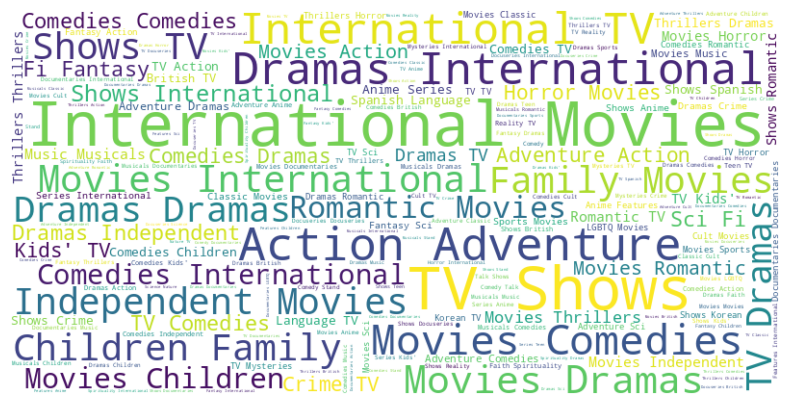

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_genres = ' '.join(df['listed_in'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Genre Analysis:


*   Top 5 Genres by Count: Dramas: 29,775, International Movies: 28,211, Comedies: 20,829, International TV Shows: 12,845, Action & Adventure: 12,216
*   The dataset provides a variety of genres, with dramas being the most prevalent, followed by international movies and comedies.


*   The distribution suggests a diverse content catalog, catering to various audience preferences.




### 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

Hint : We want you to get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix

In [ ]:
import pandas as pd

df_cleaned = df.dropna(subset=['date_added', 'release_year'])

df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])

df_cleaned['days_to_addition'] = (df_cleaned['date_added'] - pd.to_datetime(df_cleaned['release_year'], format='%Y')).dt.days

mode_days_to_addition = df_cleaned['days_to_addition'].mode().values[0]

print(f"The mode of days between release and addition to Netflix is: {mode_days_to_addition} days")

The mode of days between release and addition to Netflix is: 547 days


<ipython-input-73-d2c0b9e05cfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])
<ipython-input-73-d2c0b9e05cfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['days_to_addition'] = (df_cleaned['date_added'] - pd.to_datetime(df_cleaned['release_year'], format='%Y')).dt.days


### Mode of Days:

*   The mode of 547 days suggests that, in the recent past data, there is a recurring pattern where movies are often added to Netflix approximately 547 days after their release.
*   Understanding the mode allows for strategic planning regarding when to make content available on the platform to potentially maximize viewership and engagement.





